# AML 3104 - Neural Networks and Deep Learning 02 (DSMM Group 2)
## Final Neural network Project ( Term 3)    

### Category: Recurrent Neural Network and LSTMs
### Topic: Time-series Forecasting

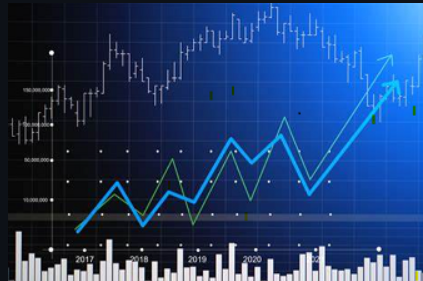

### Group members:
#### 1. Yogesh Kumar( C0852435)
#### 2. Prashant Kumar Vashney (C0850851)
#### 3. Bishal Subedi (C0852384)
#### 4. Husan Preet Singh Gill (C0851931)


# Stock Market Analysis and  Prediction using LSTM


## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
!pip install yfinance
import yfinance as yf

!pip install pandas-datareader

import pandas_datareader
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

## Data extraction and preparation

In [3]:
yf.pdr_override()

end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

APPL = pdr.DataReader('AAPL', start=start_date, end=end_date)
GOOG= pdr.DataReader('GOOG', start=start_date, end=end_date)
MSFT = pdr.DataReader('MSFT', start=start_date, end=end_date)
AMZN = pdr.DataReader('AMZN', start=start_date, end=end_date)

print(APPL)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-11  168.710007  169.029999  165.500000  165.750000  164.751968   
2022-04-12  168.020004  169.869995  166.639999  167.660004  166.650497   
2022-04-13  167.389999  171.039993  166.770004  170.399994  169.373962   
2022-04-14  170.619995  171.270004  165.039993  165.289993  164.294754   
2022-04-18  163.919998  166.600006  163.570007  165.070007  164.076080   
...                ...         ...         ...         ...         ...   
2023-04-04  166.600006  166.839996  165.110001  165.630005  165.630005   
2023-04-05  164.740005  165.050003  161.800003  163.759995

In [4]:
APPL["stock_name"]="Apple"
GOOG["stock_name"]="Google"
MSFT["stock_name"]="Microsoft"
AMZN["stock_name"]="Amazon"

In [5]:
stock_data=[APPL,GOOG,MSFT,AMZN]
df=pd.concat([APPL,GOOG,MSFT,AMZN],axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,stock_name
Date,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,164.751968,72246700,Apple
2022-04-12,168.020004,169.869995,166.639999,167.660004,166.650497,79265200,Apple
2022-04-13,167.389999,171.039993,166.770004,170.399994,169.373962,70618900,Apple
2022-04-14,170.619995,171.270004,165.039993,165.289993,164.294754,75329400,Apple
2022-04-18,163.919998,166.600006,163.570007,165.070007,164.076080,69023900,Apple
...,...,...,...,...,...,...,...
2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500,Amazon
2023-04-05,103.910004,103.910004,100.750000,101.099998,101.099998,45175400,Amazon
2023-04-06,100.750000,102.379997,99.800003,102.059998,102.059998,43808000,Amazon


## Preliminary Data Analysis

### Descriptive Statistics

In [6]:
stock_name_list=["Apple","Google","Microsoft","Amazon"]
for stk_name in stock_name_list:
    print("stats for stock {} are as follows".format(stk_name),"\n",
    df.where(df['stock_name']==stk_name).describe(),"\n")

stats for stock Apple are as follows 
              Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   149.352670  151.404422  147.471514  149.512032  149.095464   
std     10.799850   10.679189   10.848268   10.771820   10.708893   
min    126.010002  127.769997  124.169998  125.019997  124.829399   
25%    142.110001  143.854996  139.949997  142.464996  141.973434   
50%    148.869995  150.919998  147.240005  149.350006  148.910004   
75%    156.275002  158.154999  154.164993  156.779999  155.852943   
max    173.750000  176.149994  173.119995  174.550003  173.995270   

             Volume  
count  2.510000e+02  
mean   8.056603e+07  
std    2.447559e+07  
min    2.628940e+07  
25%    6.526700e+07  
50%    7.532940e+07  
75%    8.904005e+07  
max    1.826020e+08   

stats for stock Google are as follows 
              Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000 

### Information About the Data

In [7]:
for stk_name in stock_name_list:
    print("stats for stock {} are as follows".format(stk_name),"\n",
    df.where(df['stock_name']==stk_name).info(),"\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-04-11 to 2023-04-11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        251 non-null    float64
 1   High        251 non-null    float64
 2   Low         251 non-null    float64
 3   Close       251 non-null    float64
 4   Adj Close   251 non-null    float64
 5   Volume      251 non-null    float64
 6   stock_name  251 non-null    object 
dtypes: float64(6), object(1)
memory usage: 62.8+ KB
stats for stock Apple are as follows 
 None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-04-11 to 2023-04-11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        251 non-null    float64
 1   High        251 non-null    float64
 2   Low         251 non-null    float64
 3   Close       251 non-null    float64
 4   Adj Close   251 non-null    float

### Closing Price
#### The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

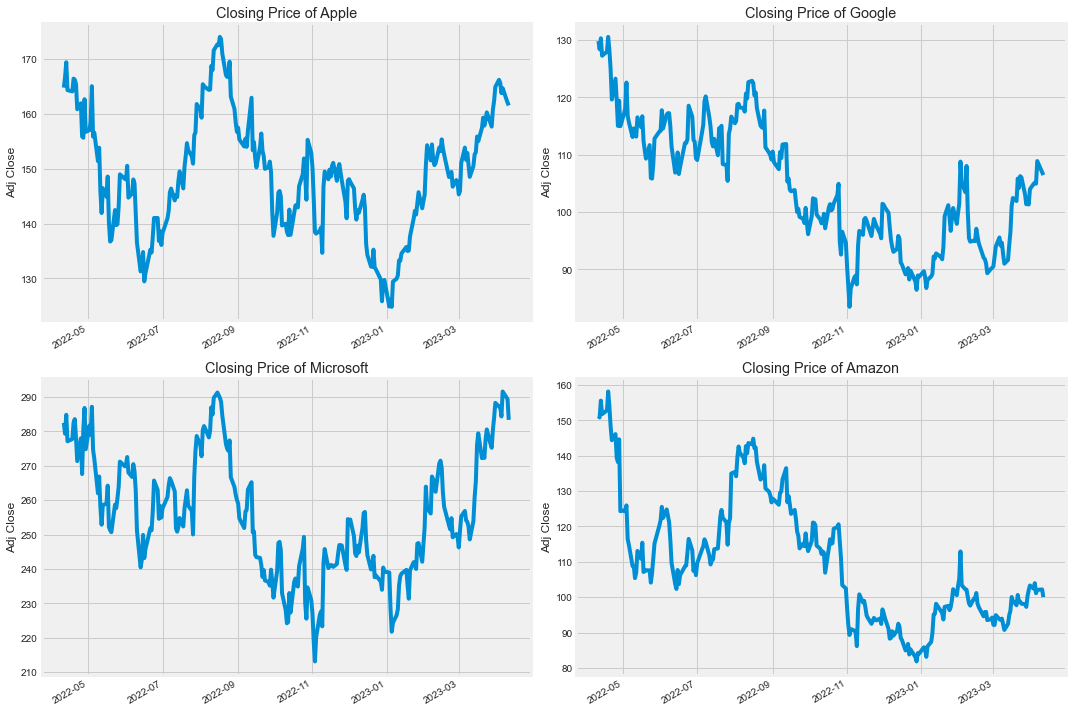

In [8]:
# Let's see a historical view of the closing price
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_data, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_name_list[i - 1]}")
    
plt.tight_layout()

In [9]:
for company in stock_data:
    company['Daily Return'] = company['Adj Close'].pct_change()

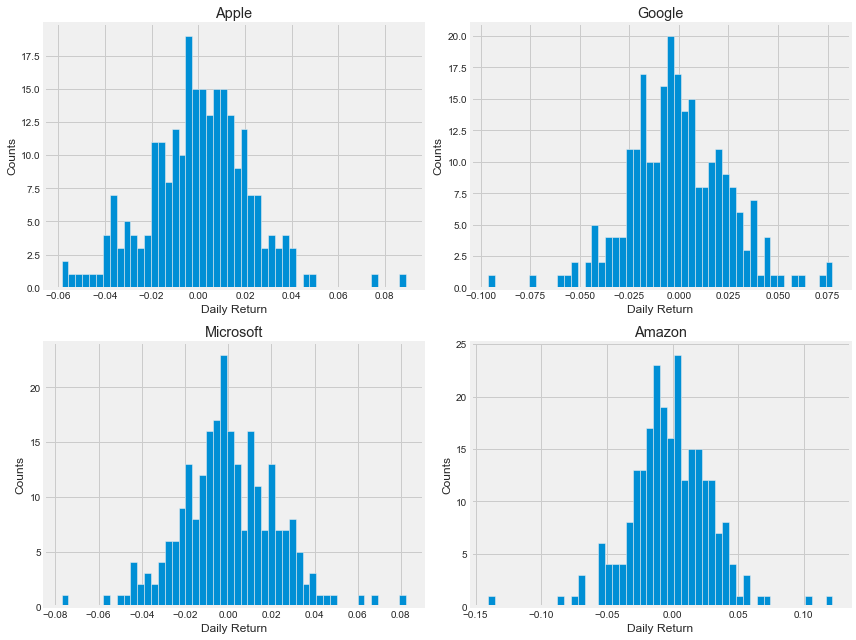

In [10]:
# lets check the daily return for each company
plt.figure(figsize=(12, 9))

for i, company in enumerate(stock_data, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock_name_list[i - 1]}')
    
plt.tight_layout()

### Correlation between different stocks closing prices

In [11]:
sr=pd.concat([APPL['Adj Close'],GOOG['Adj Close'],MSFT['Adj Close'],AMZN['Adj Close']],axis=1)
sr.columns=stock_name_list
sr.dropna()

,Apple,Google,Microsoft,Amazon
Date,,,,
2022-04-11,164.751968,129.796494,282.488739,151.121994
2022-04-12,166.650497,128.374496,279.319763,150.787506
2022-04-13,169.373962,130.285995,284.825775,155.541000
2022-04-14,164.294754,127.252998,277.111420,151.706497
2022-04-18,164.076080,127.960999,277.794708,152.785004
...,...,...,...,...
2023-04-04,165.630005,105.120003,287.179993,103.949997
2023-04-05,163.759995,104.949997,284.339996,101.099998
2023-04-06,164.660004,108.900002,291.600006,102.059998


In [12]:
cp=pd.concat([APPL['Daily Return'],GOOG['Daily Return'],MSFT['Daily Return'],AMZN['Daily Return']],axis=1)
cp.columns=stock_name_list
cp.dropna()

,Apple,Google,Microsoft,Amazon
Date,,,,
2022-04-12,0.011524,-0.010956,-0.011218,-0.002213
2022-04-13,0.016342,0.014890,0.019712,0.031524
2022-04-14,-0.029988,-0.023280,-0.027084,-0.024653
2022-04-18,-0.001331,0.005564,0.002466,0.007109
2022-04-19,0.014115,0.020084,0.017040,0.034889
...,...,...,...,...
2023-04-04,-0.003250,0.002002,-0.000174,0.015038
2023-04-05,-0.011290,-0.001617,-0.009889,-0.027417
2023-04-06,0.005496,0.037637,0.025533,0.009496


Text(0.5, 1.0, 'Correlation of stock closing price')

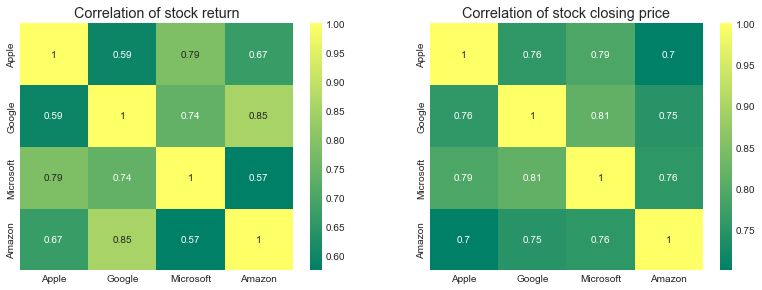

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(sr.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(cp.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

##### From above heatmap we can say that Amazon and Google stocks are highly correlated . Also Amazon and Microsoft stocks are least correlated

### Predicting the closing price stock price of APPLE inc:

In [14]:
# Getting the stock quote for last 10 years 
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500193,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400
...,...,...,...,...,...,...
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100


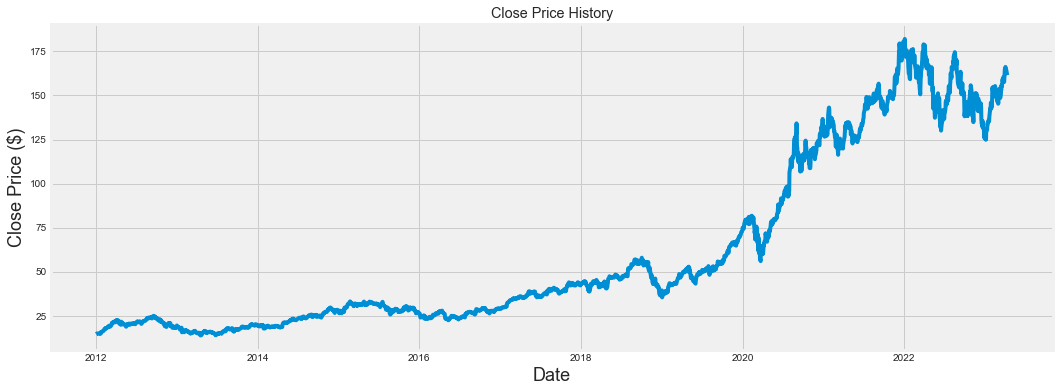

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2695

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89676465],
       [0.88111568],
       [0.8779621 ]])

In [18]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [19]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])



In [20]:
# Defining callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)
#training the model
history=model.fit(x_train, 
          y_train, 
          epochs=25, 
          batch_size = 32,
          callbacks = [checkpointer])


Epoch 1/25
83/83 [==============================] - 6s 39ms/step - loss: 0.0044 - accuracy: 7.5901e-04
Epoch 2/25
83/83 [==============================] - 3s 36ms/step - loss: 3.9552e-04 - accuracy: 7.5901e-04
Epoch 3/25
83/83 [==============================] - 3s 35ms/step - loss: 3.4666e-04 - accuracy: 7.5901e-04
Epoch 4/25
83/83 [==============================] - 3s 36ms/step - loss: 3.7412e-04 - accuracy: 7.5901e-04
Epoch 5/25
83/83 [==============================] - 3s 35ms/step - loss: 3.7159e-04 - accuracy: 7.5901e-04
Epoch 6/25
83/83 [==============================] - 3s 37ms/step - loss: 3.5278e-04 - accuracy: 7.5901e-04
Epoch 7/25
83/83 [==============================] - 3s 36ms/step - loss: 2.9897e-04 - accuracy: 7.5901e-04
Epoch 8/25
83/83 [==============================] - 3s 37ms/step - loss: 2.8217e-04 - accuracy: 7.5901e-04
Epoch 9/25
83/83 [==============================] - 3s 36ms/step - loss: 2.5243e-04 - accuracy: 7.5901e-04
Epoch 10/25
83/83 [======================

In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 12ms/step


3.6743247385822744

C:\Users\Yogi\AppData\Local\Temp/ipykernel_18632/3833102326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


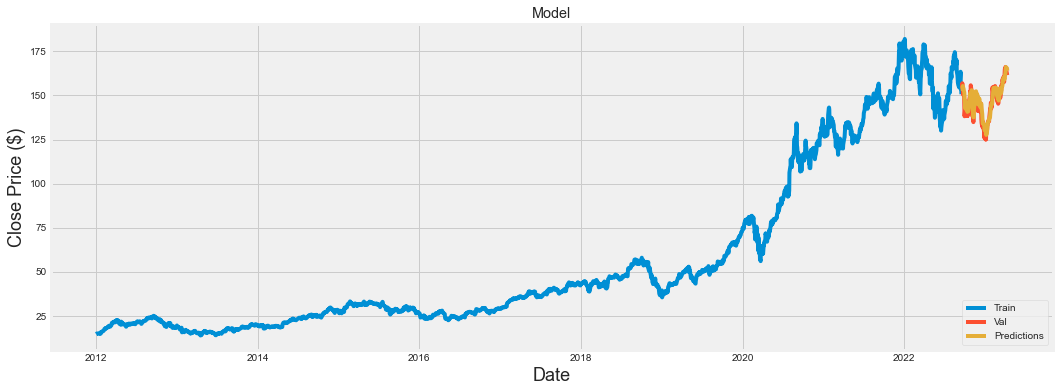

In [22]:
# Plotting the taining and predicted data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
print(f"the LSTM model have accuracy {history.history['accuracy'][0]*100000}% precdicting close prices values of Apple stock")


the LSTM model have accuracy 75.90132881887257% precdicting close prices values of Apple stock


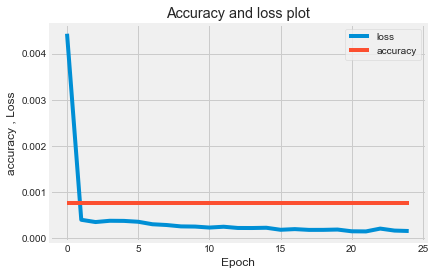

In [24]:
loss=history.history['loss']
acc=history.history['accuracy']

import matplotlib.pyplot as plt

plt.plot(loss, label='loss')
plt.plot(acc, label='accuracy')
plt.ylabel('accuracy , Loss')
plt.xlabel('Epoch')
plt.title('Accuracy and loss plot')
plt.legend()

plt.show()

In [25]:
#below are the predictions values
valid

,Close,Predictions
Date,,
2022-09-19,154.479996,153.830032
2022-09-20,156.899994,153.614029
2022-09-21,153.720001,155.026291
2022-09-22,152.740005,155.351120
2022-09-23,150.429993,154.924637
...,...,...
2023-04-04,165.630005,165.005524
2023-04-05,163.759995,166.120422
2023-04-06,164.660004,165.788071


### Above are the actual close prices values for APPLE stock and values predicted by LSTM model. we can say that model is predicting well with 75.9% accuracy.